In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
testData = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
print(data.shape)
data.head()

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
print(testData.shape)
testData.head()

(20, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [5]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
testData.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
def FloatConversion(x):
    x = str(x)
    x = x.replace(',', '').replace("'", '')
    return float(x)


data = data[['Date', 'Close']]
testData = testData[['Date', 'Close']]


data['Close'] = data['Close'].apply(FloatConversion)
testData['Close'] = testData['Close'].apply(FloatConversion)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Close   1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [9]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Close   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [10]:
data.head()

,Date,Close
0,1/3/2012,663.59
1,1/4/2012,666.45
2,1/5/2012,657.21
3,1/6/2012,648.24
4,1/9/2012,620.76


In [11]:
testData.head()

,Date,Close
0,1/3/2017,786.14
1,1/4/2017,786.90
2,1/5/2017,794.02
3,1/6/2017,806.15
4,1/9/2017,806.65


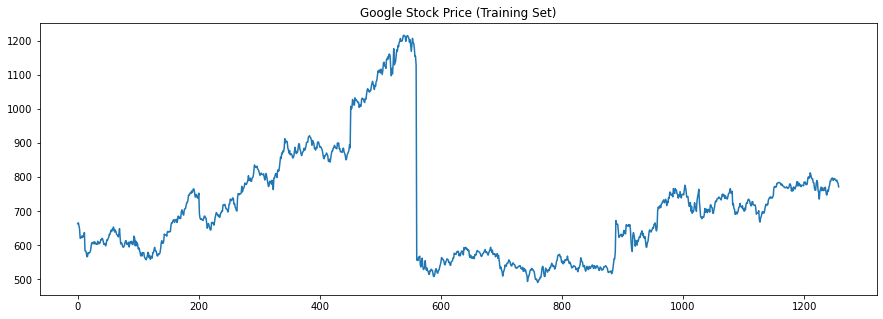

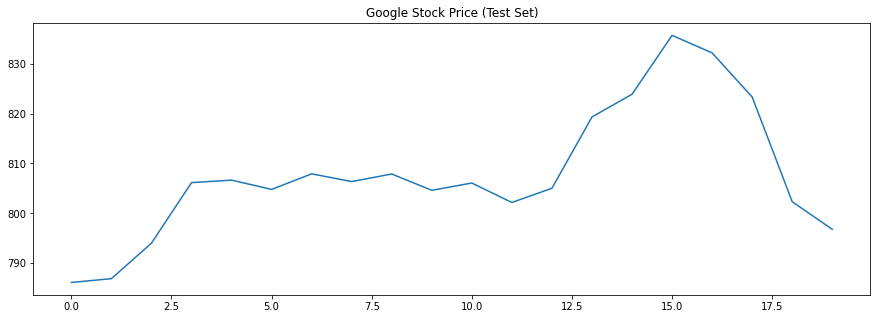

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(data['Close'])
plt.title('Google Stock Price (Training Set)')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(testData['Close'])
plt.title('Google Stock Price (Test Set)')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

data['Close'] = sc.fit_transform(data['Close'].values.reshape(-1, 1))
testData['Close'] = sc.transform(testData['Close'].values.reshape(-1, 1))

In [14]:
data.head()

,Date,Close
0,1/3/2012,0.237573
1,1/4/2012,0.241514
2,1/5/2012,0.228781
3,1/6/2012,0.216419
4,1/9/2012,0.178548


In [15]:
testData.head()

,Date,Close
0,1/3/2017,0.406461
1,1/4/2017,0.407508
2,1/5/2017,0.417320
3,1/6/2017,0.434037
4,1/9/2017,0.434726


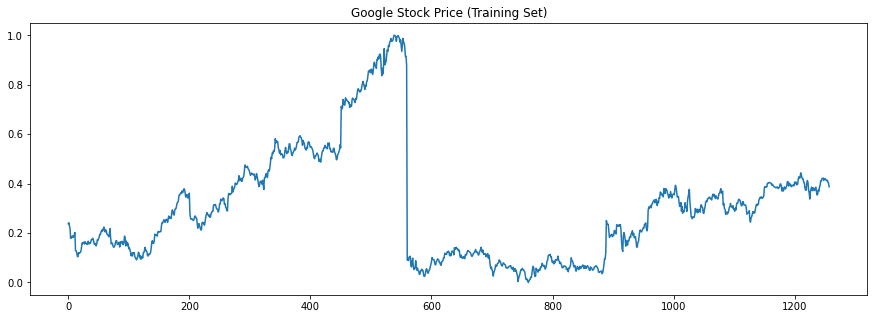

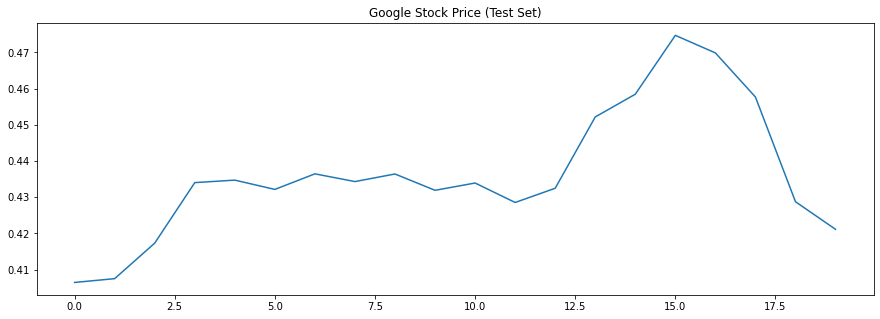

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(data['Close'])
plt.title('Google Stock Price (Training Set)')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(testData['Close'])
plt.title('Google Stock Price (Test Set)')
plt.show()

In [17]:
X_train = []
y_train = []
timesteps = 50
CloseData = list(data['Close'])
for i in range(timesteps, len(CloseData)):
    X_train.append(CloseData[i-timesteps:i])
    y_train.append(CloseData[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
print(X_train.shape, y_train.shape)

(1208, 50) (1208,)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5

In [21]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 53ms/step - loss: 0.4222
Epoch 2/100
38/38 [==============================] - 2s 48ms/step - loss: 0.2527
Epoch 3/100
38/38 [==============================] - 2s 44ms/step - loss: 0.1926
Epoch 4/100
38/38 [==============================] - 2s 50ms/step - loss: 0.1589
Epoch 5/100
38/38 [==============================] - 2s 49ms/step - loss: 0.1146
Epoch 6/100
38/38 [==============================] - 2s 50ms/step - loss: 0.1053
Epoch 7/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0857
Epoch 8/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0695
Epoch 9/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0568
Epoch 10/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0429
Epoch 11/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0419
Epoch 12/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0336
Epoch 13/100
38/38 [====

38/38 [==============================] - 2s 16ms/step


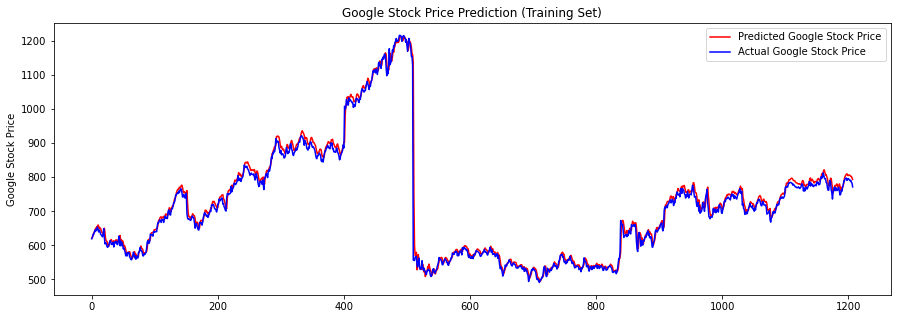

In [22]:
ypred = model.predict(X_train)
ypred = sc.inverse_transform(ypred)

y_train = sc.inverse_transform(y_train.reshape(-1, 1))


plt.figure(figsize=(15, 5))
plt.plot(ypred, color='red', label='Predicted Google Stock Price')
plt.plot(y_train, color='blue', label='Actual Google Stock Price')
plt.title('Google Stock Price Prediction (Training Set)')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [23]:
XTest = []
CloseData = list(testData['Close'])
timeSteps = 50

trainLast = list(data['Close'])[-timeSteps:]

CloseData = trainLast + CloseData

for i in range(timeSteps, len(CloseData)):
    XTest.append(CloseData[i-timeSteps:i])

XTest = np.array(XTest)
print(XTest.shape)

(20, 50)


1/1 [==============================] - 0s 79ms/step


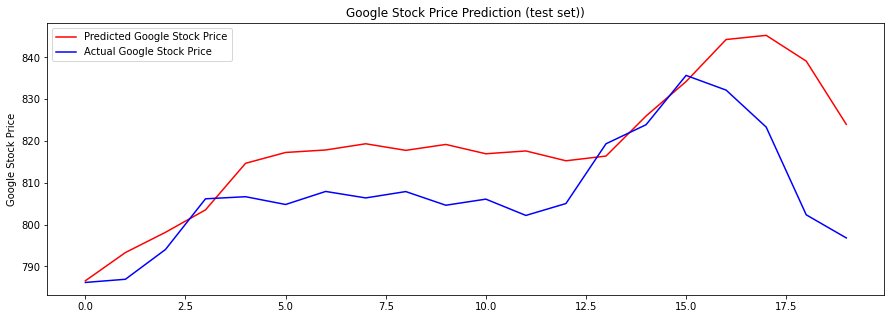

In [24]:
ypred = model.predict(XTest)
ypred = sc.inverse_transform(ypred)

Orignal = sc.inverse_transform(testData['Close'].values.reshape(-1, 1))

plt.figure(figsize=(15, 5))
plt.plot(ypred, color='red', label='Predicted Google Stock Price')
plt.plot(Orignal, color='blue', label='Actual Google Stock Price')
plt.title('Google Stock Price Prediction (test set))')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()